# Import Libraries:

In [1]:
#Predicting Insurance Claim Amounts

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

In [3]:
df = pd.read_excel("Maturity_Data.xlsx")
df

,Policy Number,Branch,DOC,Claim Due Date,Plan,Policy Term,Claim Amount,Vested Bonus,Interim Bonus,Final Additional Bonus,Premium,Mode,Master FUP,Anomaly Flag
0,100614068,4015,2004-06-09,2007-03-08,14,20,38563.221899,33701.647606,9339.244017,6089.621520,4063.435561,3,2001-12-01,0
1,102314313,4015,2012-08-29,2014-02-21,111,8,51666.039139,48711.268825,8972.874719,8406.386946,3294.850477,3,1997-12-01,0
2,103484630,4015,1991-11-16,2007-01-24,111,20,88906.524820,33410.777170,5533.966318,3261.268054,1372.759863,12,2002-12-01,0
3,103807155,4015,1992-10-13,2010-05-25,106,20,115663.536961,35299.418047,3548.046346,394.057076,3083.742767,3,2002-12-01,0
4,106977991,4015,1991-09-13,1998-08-05,75,15,82153.702496,32676.704921,7189.802411,7869.917926,2106.719340,6,2012-03-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,992994062,4015,2007-11-06,2014-05-05,801,20,28307.261217,26322.799270,9544.529839,8895.742139,3974.582725,3,2003-09-01,0
656,995226828,4015,1990-10-04,2002-04-22,111,15,135585.986650,5754.263335,2457.847792,1312.057764,1385.207547,12,1997-12-01,0
657,995619255,4015,1992-06-13,2009-05-07,801,8,119383.675764,3047.881855,2687.171521,737.093896,1584.796212,3,1997-12-01,0
658,997677788,4015,2017-08-13,2008-11-04,111,15,34245.539340,12329.503417,9509.902621,4185.656861,4200.645575,12,2012-03-01,0


# EDA

In [4]:
df.head()

,Policy Number,Branch,DOC,Claim Due Date,Plan,Policy Term,Claim Amount,Vested Bonus,Interim Bonus,Final Additional Bonus,Premium,Mode,Master FUP,Anomaly Flag
0,100614068,4015,2004-06-09,2007-03-08,14,20,38563.221899,33701.647606,9339.244017,6089.621520,4063.435561,3,2001-12-01,0
1,102314313,4015,2012-08-29,2014-02-21,111,8,51666.039139,48711.268825,8972.874719,8406.386946,3294.850477,3,1997-12-01,0
2,103484630,4015,1991-11-16,2007-01-24,111,20,88906.524820,33410.777170,5533.966318,3261.268054,1372.759863,12,2002-12-01,0
3,103807155,4015,1992-10-13,2010-05-25,106,20,115663.536961,35299.418047,3548.046346,394.057076,3083.742767,3,2002-12-01,0
4,106977991,4015,1991-09-13,1998-08-05,75,15,82153.702496,32676.704921,7189.802411,7869.917926,2106.719340,6,2012-03-01,0


In [5]:
df.tail()

,Policy Number,Branch,DOC,Claim Due Date,Plan,Policy Term,Claim Amount,Vested Bonus,Interim Bonus,Final Additional Bonus,Premium,Mode,Master FUP,Anomaly Flag
655,992994062,4015,2007-11-06,2014-05-05,801,20,28307.261217,26322.799270,9544.529839,8895.742139,3974.582725,3,2003-09-01,0
656,995226828,4015,1990-10-04,2002-04-22,111,15,135585.986650,5754.263335,2457.847792,1312.057764,1385.207547,12,1997-12-01,0
657,995619255,4015,1992-06-13,2009-05-07,801,8,119383.675764,3047.881855,2687.171521,737.093896,1584.796212,3,1997-12-01,0
658,997677788,4015,2017-08-13,2008-11-04,111,15,34245.539340,12329.503417,9509.902621,4185.656861,4200.645575,12,2012-03-01,0
659,997835424,4015,1996-01-15,2015-08-01,75,20,59483.283148,22964.141837,9940.657360,8025.802829,4182.606997,3,1997-12-01,1


In [6]:
df.shape

(660, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Policy Number           660 non-null    int64         
 1   Branch                  660 non-null    int64         
 2   DOC                     660 non-null    datetime64[ns]
 3   Claim Due Date          660 non-null    datetime64[ns]
 4   Plan                    660 non-null    int64         
 5   Policy Term             660 non-null    int64         
 6   Claim Amount            660 non-null    float64       
 7   Vested Bonus            660 non-null    float64       
 8   Interim Bonus           660 non-null    float64       
 9   Final Additional Bonus  660 non-null    float64       
 10  Premium                 660 non-null    float64       
 11  Mode                    660 non-null    int64         
 12  Master FUP              660 non-null    datetime64

In [8]:
df.isnull().sum()

Policy Number             0
Branch                    0
DOC                       0
Claim Due Date            0
Plan                      0
Policy Term               0
Claim Amount              0
Vested Bonus              0
Interim Bonus             0
Final Additional Bonus    0
Premium                   0
Mode                      0
Master FUP                0
Anomaly Flag              0
dtype: int64

In [9]:
df.describe()

,Policy Number,Branch,Plan,Policy Term,Claim Amount,Vested Bonus,Interim Bonus,Final Additional Bonus,Premium,Mode,Anomaly Flag
count,6.600000e+02,660.0,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,5.368162e+08,4015.0,223.871212,14.446970,89360.678463,24969.385179,4965.241710,4908.834035,3033.502710,7.040909,0.227273
std,2.566467e+08,0.0,293.504770,4.887062,42786.075945,14305.343440,2946.656550,2966.336216,1300.846029,3.749739,0.419388
min,1.006141e+08,4015.0,14.000000,8.000000,10725.402497,0.000000,0.000000,0.000000,193.000000,3.000000,0.000000
25%,3.231482e+08,4015.0,75.000000,8.000000,55757.494889,13068.237401,2429.554864,2261.500676,2041.618086,3.000000,0.000000
50%,5.315294e+08,4015.0,106.000000,15.000000,87340.890238,25008.104368,4972.761946,4893.369514,3043.877088,6.000000,0.000000
75%,7.572095e+08,4015.0,111.000000,20.000000,121159.523297,36438.648823,7526.236852,7458.618681,3986.364273,12.000000,0.000000
max,9.978354e+08,4015.0,801.000000,20.000000,198017.318405,49978.600351,9998.995526,9974.690996,20000.000000,12.000000,1.000000


In [10]:
df.dtypes

Policy Number                      int64
Branch                             int64
DOC                       datetime64[ns]
Claim Due Date            datetime64[ns]
Plan                               int64
Policy Term                        int64
Claim Amount                     float64
Vested Bonus                     float64
Interim Bonus                    float64
Final Additional Bonus           float64
Premium                          float64
Mode                               int64
Master FUP                datetime64[ns]
Anomaly Flag                       int64
dtype: object

In [11]:
df = df.drop_duplicates()
df.shape

(660, 14)

In [12]:
df.columns

Index(['Policy Number', 'Branch', 'DOC', 'Claim Due Date', 'Plan',
       'Policy Term', 'Claim Amount', 'Vested Bonus', 'Interim Bonus',
       'Final Additional Bonus', 'Premium', 'Mode', 'Master FUP',
       'Anomaly Flag'],
      dtype='object')

# Find zero values

In [13]:
#Count the zero values from Dataframe

def columns_with_zeros(df):
    zero_counts = df.eq(0).sum()
    for column_name, count in zero_counts.items():
        if count > 0:
            print(f"Column '{column_name}' has zero's : {count} ")

columns_with_zeros(df)

Column 'Vested Bonus' has zero's : 6 
Column 'Interim Bonus' has zero's : 5 
Column 'Final Additional Bonus' has zero's : 10 
Column 'Anomaly Flag' has zero's : 510 


# Correlation Matrix

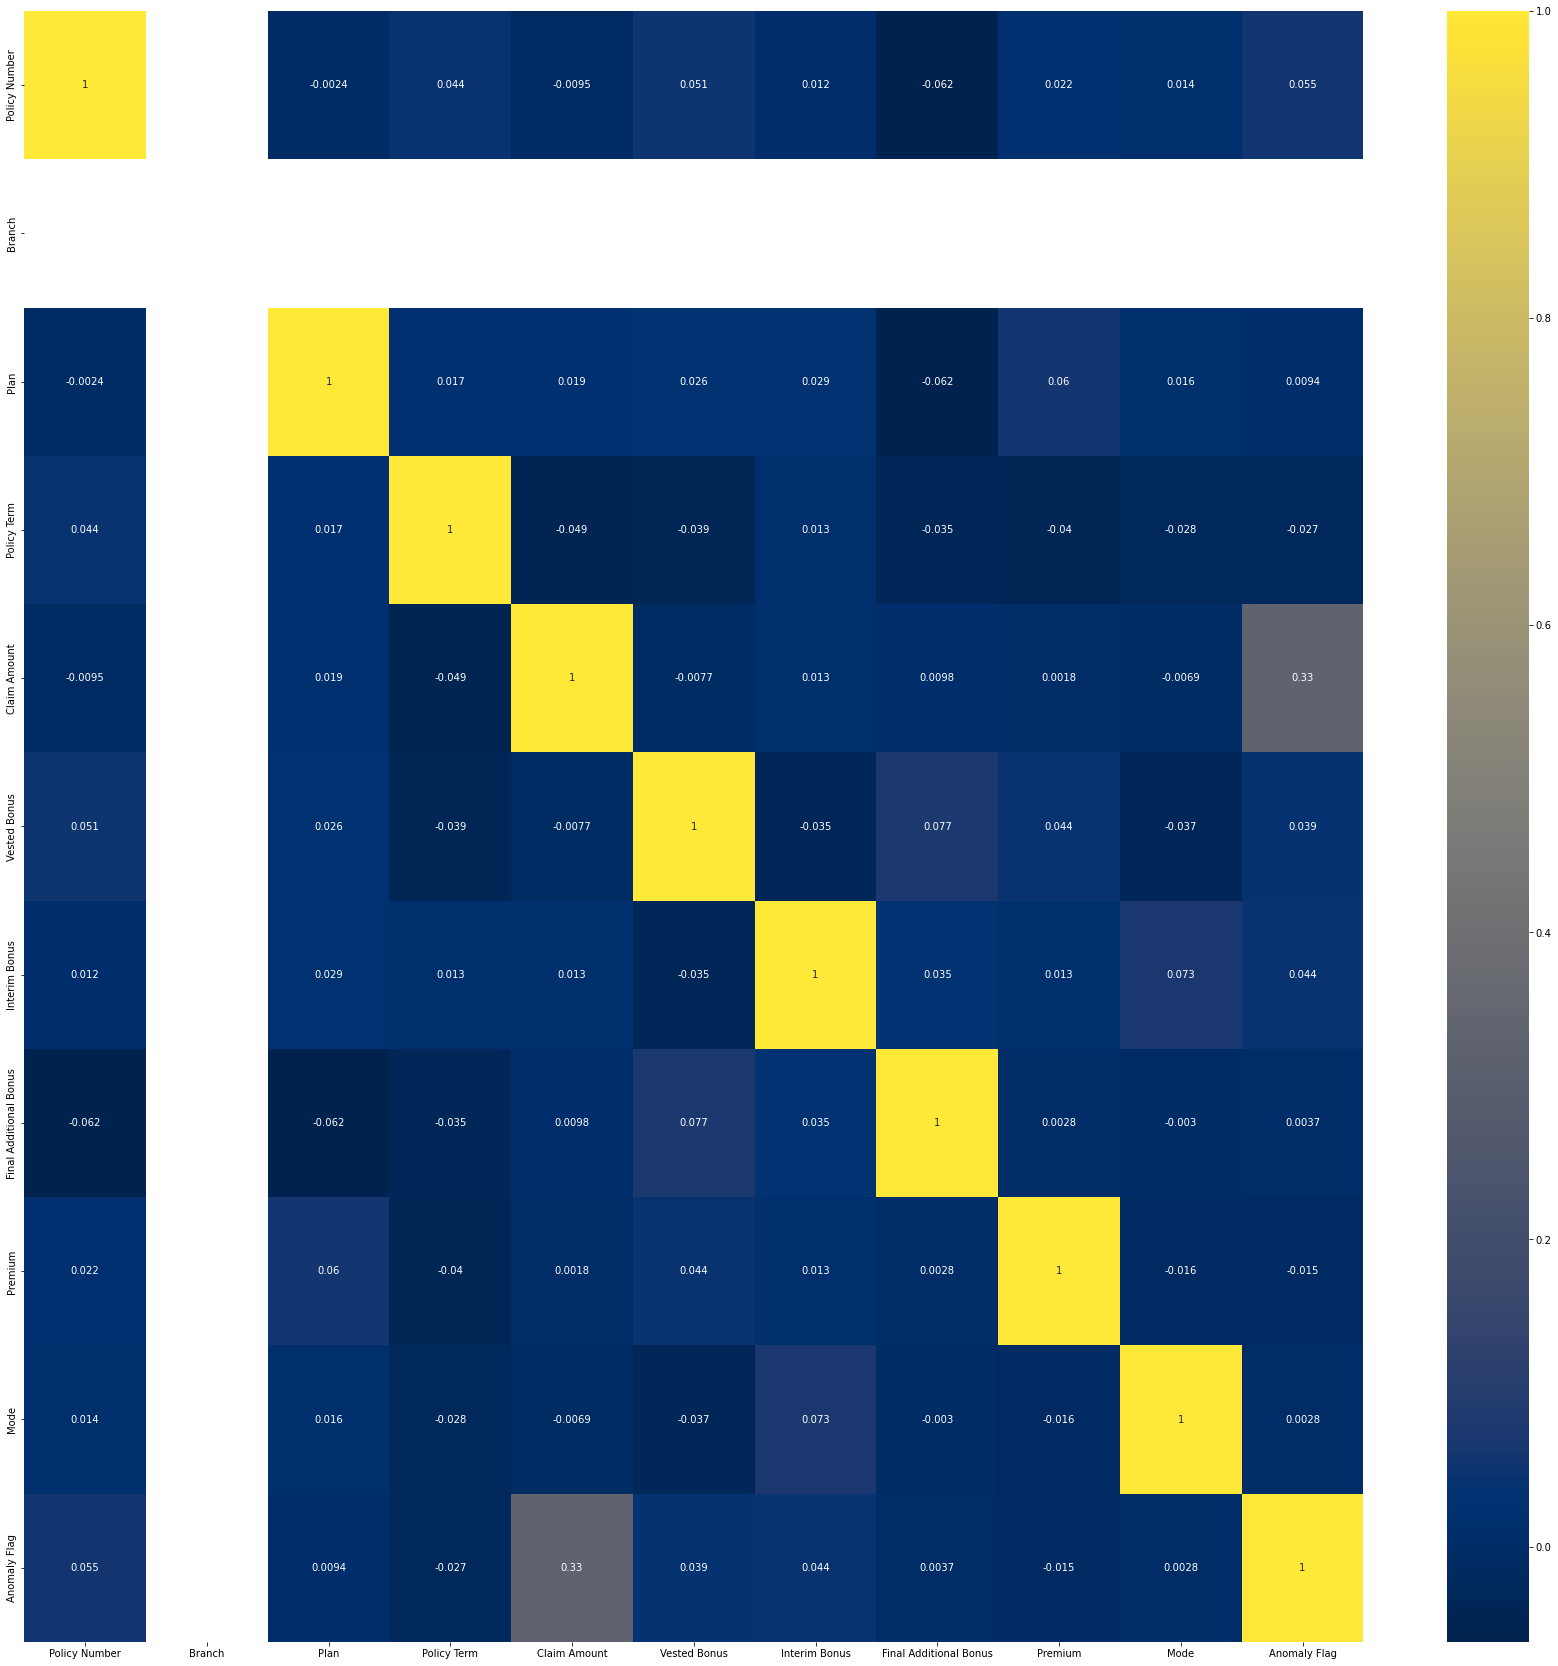

In [14]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(30,30))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='cividis')

In [15]:
df.drop('Branch',axis = 1,inplace =True)
df.drop('DOC',axis = 1,inplace = True)
df.drop('Claim Due Date',axis =1 ,inplace = True)
df.drop('Master FUP',axis = 1,inplace = True)

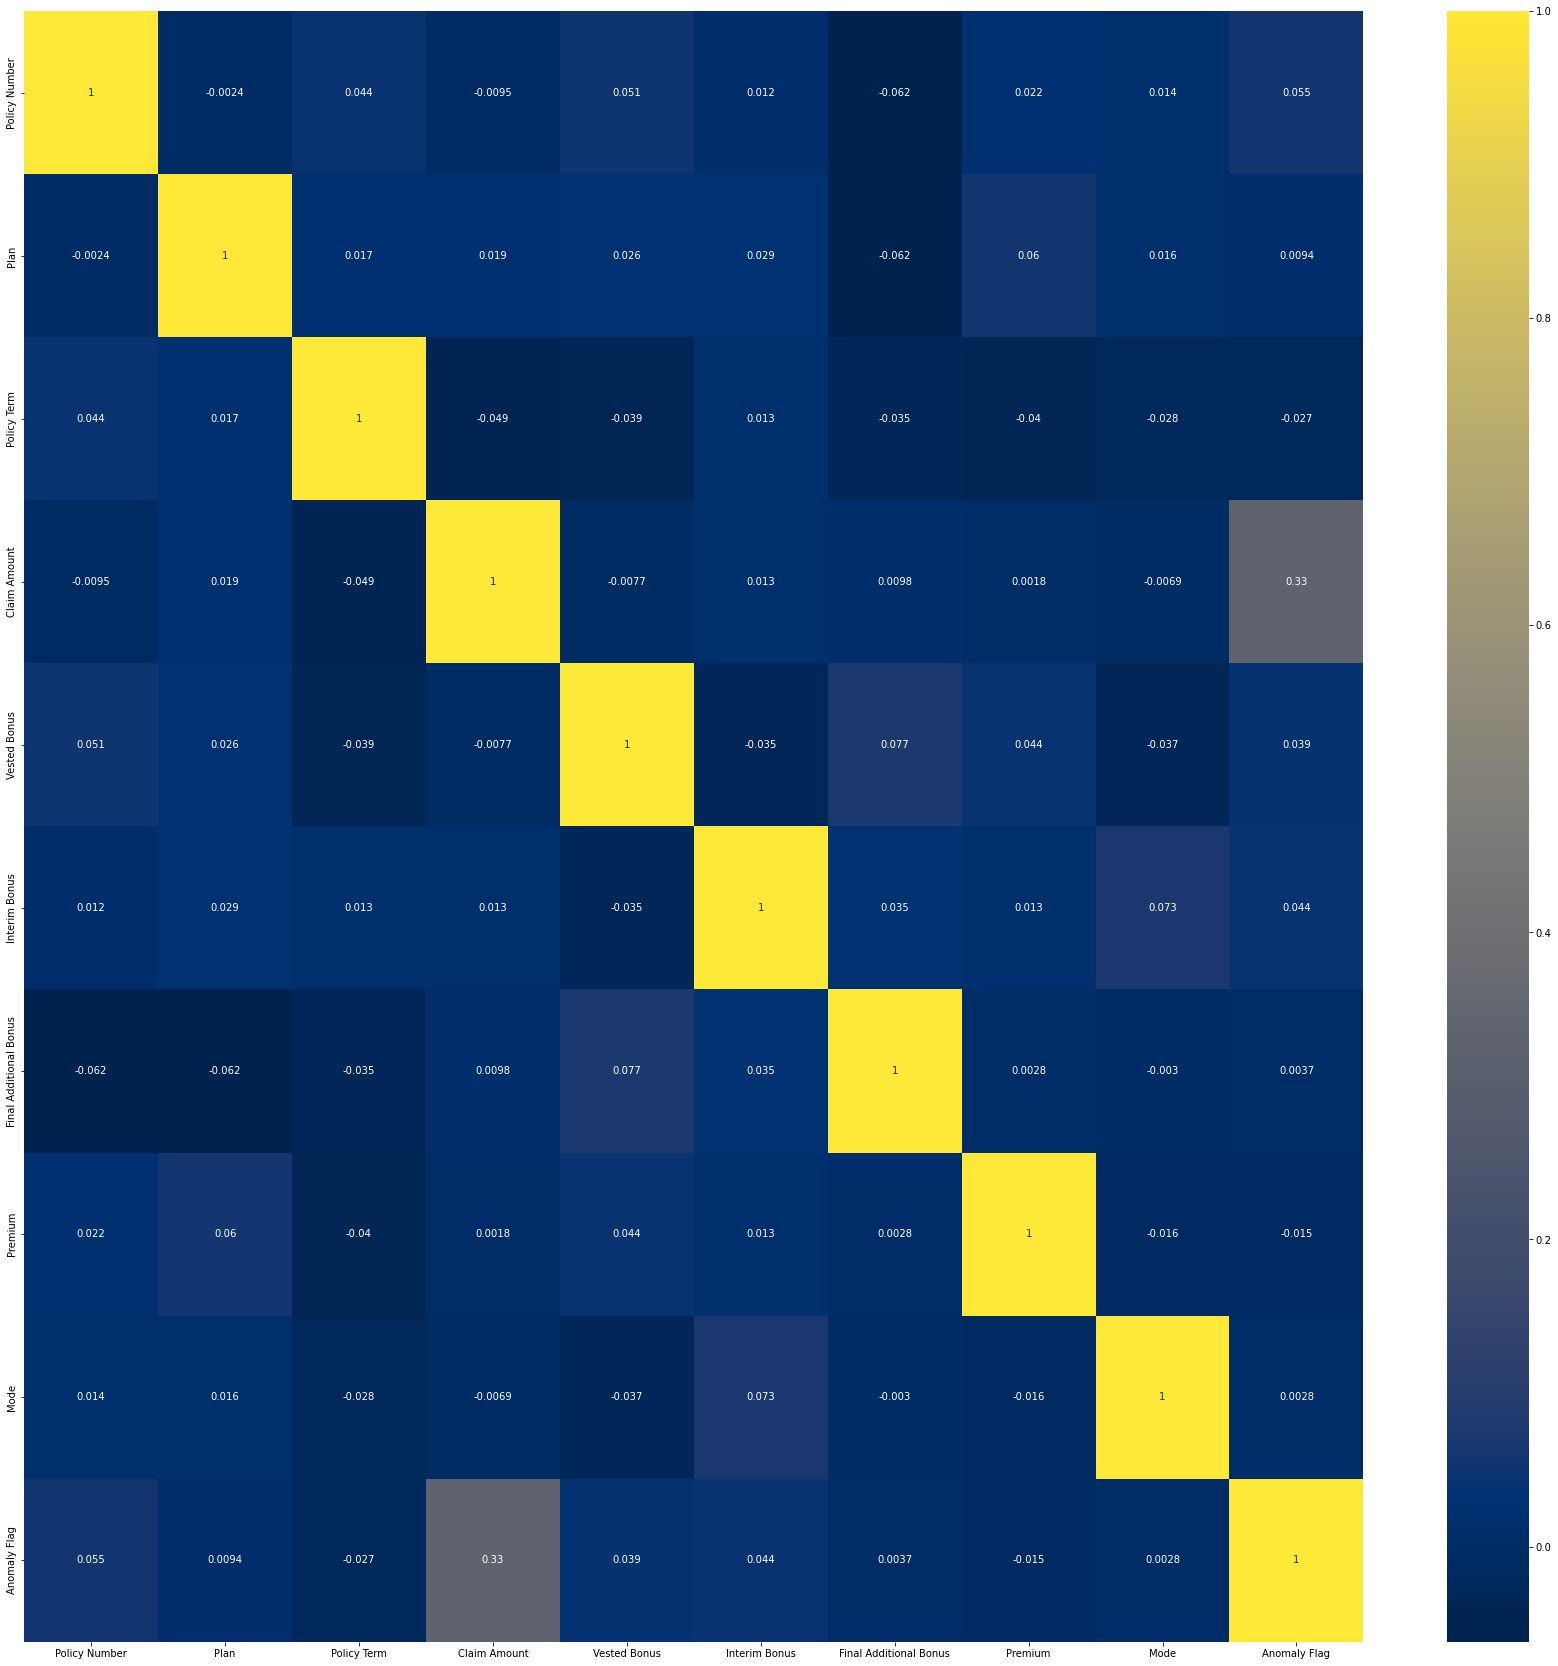

In [16]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(30,30))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='cividis')

# Outlier Detection

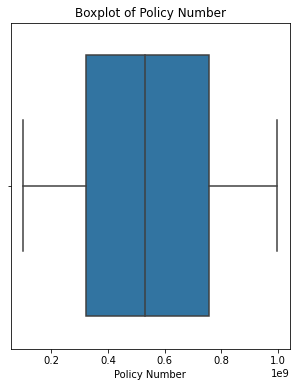

Outliers in Policy Number:
No outliers found.


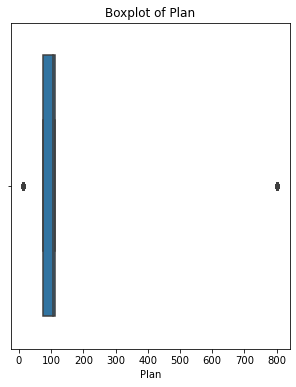

Outliers in Plan:
0       14
6      801
16      14
19     801
23      14
      ... 
643     14
645     14
651    801
655    801
657    801
Name: Plan, Length: 261, dtype: int64


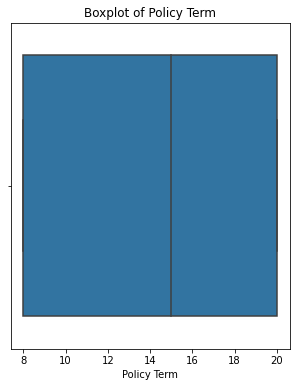

Outliers in Policy Term:
No outliers found.


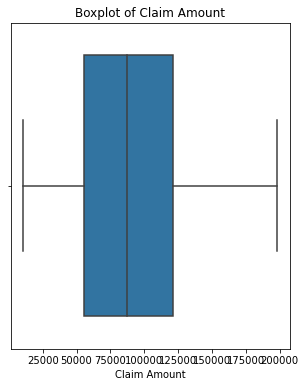

Outliers in Claim Amount:
No outliers found.


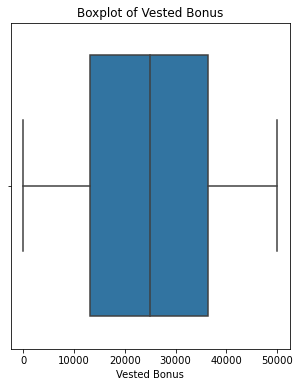

Outliers in Vested Bonus:
No outliers found.


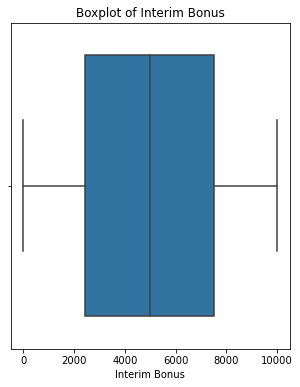

Outliers in Interim Bonus:
No outliers found.


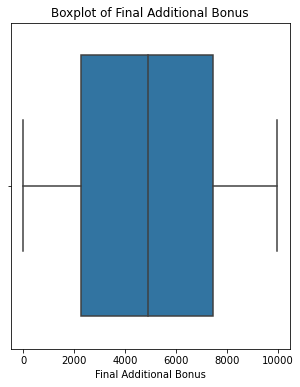

Outliers in Final Additional Bonus:
No outliers found.


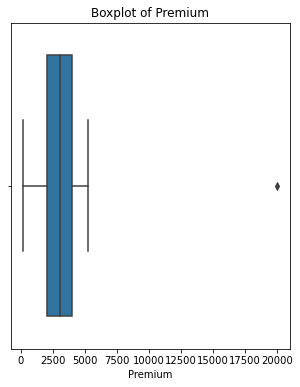

Outliers in Premium:
263    20000.0
Name: Premium, dtype: float64


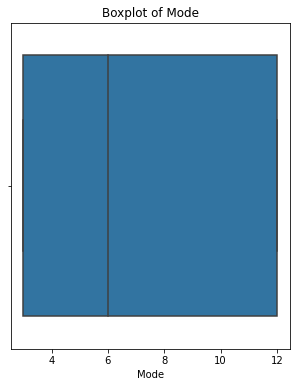

Outliers in Mode:
No outliers found.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_and_find_outliers(df):
    for column in df.columns[:-1]:  
        if df[column].dtype in ['int64', 'float64']: 
            plt.figure(figsize=(5, 6))
            sns.boxplot(x=df[column])

            plt.title(f'Boxplot of {column}')
            plt.xlabel(column)

            plt.show()

            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

            print(f'Outliers in {column}:')
            if len(outliers) == 0:
                print('No outliers found.')
            else:
                print(outliers)

visualize_and_find_outliers(df)


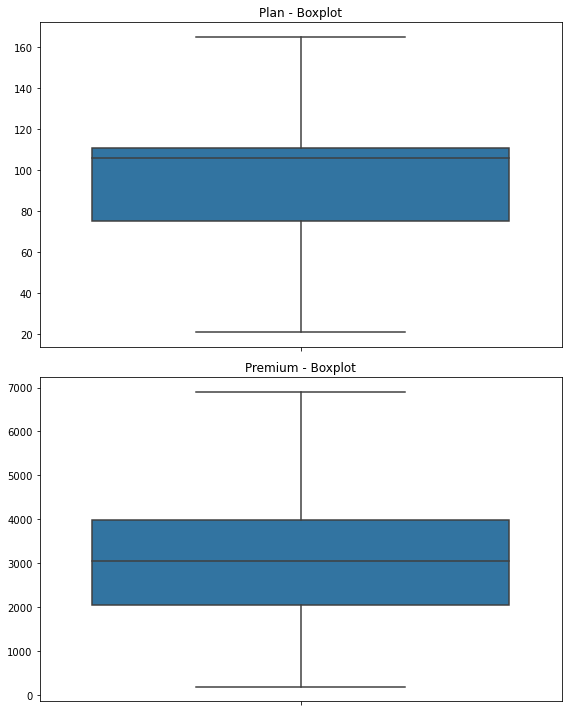

In [18]:
def visualize_with_capping(df):
    capped_df = df.copy()
    
    columns_to_cap = ['Plan', 'Premium']
    
    for col in columns_to_cap:
        q1 = capped_df[col].quantile(0.25)
        q3 = capped_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        capped_df[col] = capped_df[col].clip(lower=lower_bound, upper=upper_bound)

    num_cols = len(columns_to_cap)
    fig, axes = plt.subplots(num_cols, 1, figsize=(8, 5*num_cols))
    
    for i, col_name in enumerate(columns_to_cap):
        sns.boxplot(data=capped_df, y=col_name, ax=axes[i])
        axes[i].set_title(f'{col_name} - Boxplot')
        axes[i].set_ylabel('')
    
    plt.tight_layout()
    plt.show()

# Call the function
visualize_with_capping(df)


# One Hot Encoding

In [19]:
def one_hot_encode(df, columns):
    df_encoded = pd.get_dummies(df, columns=columns)
    return df_encoded

columns_to_encode = ['Plan', 'Policy Term', 'Mode']

df = one_hot_encode(df, columns_to_encode)

df

,Policy Number,Claim Amount,Vested Bonus,Interim Bonus,Final Additional Bonus,Premium,Anomaly Flag,Plan_14,Plan_75,Plan_106,Plan_111,Plan_801,Policy Term_8,Policy Term_10,Policy Term_15,Policy Term_16,Policy Term_20,Mode_3,Mode_6,Mode_12
0,100614068,38563.221899,33701.647606,9339.244017,6089.621520,4063.435561,0,1,0,0,0,0,0,0,0,0,1,1,0,0
1,102314313,51666.039139,48711.268825,8972.874719,8406.386946,3294.850477,0,0,0,0,1,0,1,0,0,0,0,1,0,0
2,103484630,88906.524820,33410.777170,5533.966318,3261.268054,1372.759863,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,103807155,115663.536961,35299.418047,3548.046346,394.057076,3083.742767,0,0,0,1,0,0,0,0,0,0,1,1,0,0
4,106977991,82153.702496,32676.704921,7189.802411,7869.917926,2106.719340,0,0,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,992994062,28307.261217,26322.799270,9544.529839,8895.742139,3974.582725,0,0,0,0,0,1,0,0,0,0,1,1,0,0
656,995226828,135585.986650,5754.263335,2457.847792,1312.057764,1385.207547,0,0,0,0,1,0,0,0,1,0,0,0,0,1
657,995619255,119383.675764,3047.881855,2687.171521,737.093896,1584.796212,0,0,0,0,0,1,1,0,0,0,0,1,0,0
658,997677788,34245.539340,12329.503417,9509.902621,4185.656861,4200.645575,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [20]:
df.shape

(660, 20)

In [21]:
df.columns

Index(['Policy Number', 'Claim Amount', 'Vested Bonus', 'Interim Bonus',
       'Final Additional Bonus', 'Premium', 'Anomaly Flag', 'Plan_14',
       'Plan_75', 'Plan_106', 'Plan_111', 'Plan_801', 'Policy Term_8',
       'Policy Term_10', 'Policy Term_15', 'Policy Term_16', 'Policy Term_20',
       'Mode_3', 'Mode_6', 'Mode_12'],
      dtype='object')

In [22]:
df.describe()

,Policy Number,Claim Amount,Vested Bonus,Interim Bonus,Final Additional Bonus,Premium,Anomaly Flag,Plan_14,Plan_75,Plan_106,Plan_111,Plan_801,Policy Term_8,Policy Term_10,Policy Term_15,Policy Term_16,Policy Term_20,Mode_3,Mode_6,Mode_12
count,6.600000e+02,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.00000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,5.368162e+08,89360.678463,24969.385179,4965.241710,4908.834035,3033.502710,0.227273,0.192424,0.213636,0.172727,0.218182,0.20303,0.319697,0.001515,0.337879,0.003030,0.337879,0.328788,0.333333,0.337879
std,2.566467e+08,42786.075945,14305.343440,2946.656550,2966.336216,1300.846029,0.419388,0.394503,0.410184,0.378298,0.413325,0.40256,0.466713,0.038925,0.473346,0.055006,0.473346,0.470129,0.471762,0.473346
min,1.006141e+08,10725.402497,0.000000,0.000000,0.000000,193.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.231482e+08,55757.494889,13068.237401,2429.554864,2261.500676,2041.618086,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.315294e+08,87340.890238,25008.104368,4972.761946,4893.369514,3043.877088,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.572095e+08,121159.523297,36438.648823,7526.236852,7458.618681,3986.364273,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,9.978354e+08,198017.318405,49978.600351,9998.995526,9974.690996,20000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Split The Dataset in X & Y

In [23]:
X = df.drop(columns=['Anomaly Flag'])  
Y = df['Anomaly Flag'] 

In [24]:
X.head()

,Policy Number,Claim Amount,Vested Bonus,Interim Bonus,Final Additional Bonus,Premium,Plan_14,Plan_75,Plan_106,Plan_111,Plan_801,Policy Term_8,Policy Term_10,Policy Term_15,Policy Term_16,Policy Term_20,Mode_3,Mode_6,Mode_12
0,100614068,38563.221899,33701.647606,9339.244017,6089.621520,4063.435561,1,0,0,0,0,0,0,0,0,1,1,0,0
1,102314313,51666.039139,48711.268825,8972.874719,8406.386946,3294.850477,0,0,0,1,0,1,0,0,0,0,1,0,0
2,103484630,88906.524820,33410.777170,5533.966318,3261.268054,1372.759863,0,0,0,1,0,0,0,0,0,1,0,0,1
3,103807155,115663.536961,35299.418047,3548.046346,394.057076,3083.742767,0,0,1,0,0,0,0,0,0,1,1,0,0
4,106977991,82153.702496,32676.704921,7189.802411,7869.917926,2106.719340,0,1,0,0,0,0,0,1,0,0,0,1,0


In [25]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Anomaly Flag, dtype: int64

In [26]:
Y.value_counts()

0    510
1    150
Name: Anomaly Flag, dtype: int64

# Standarization

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

# Balance the Data

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(SSX, Y)

In [29]:
X.shape

(1020, 19)

In [30]:
Y.value_counts()

0    510
1    510
Name: Anomaly Flag, dtype: int64

# Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.2, random_state = 7)

In [32]:
Y_train.shape ,Y_test.shape

((816,), (204,))

In [33]:
X_train.shape ,X_test.shape

((816, 19), (204, 19))

# Build Model

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Define a pipeline with StandardScaler and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Define the parameter grid for grid search
param_grid = {
    'svc__C': [0.1, 1, 10],                     # Regularization parameter
    'svc__kernel': ['linear', 'rbf', 'poly'],   # Kernel type
    'svc__gamma': ['scale', 'auto', 0.1, 1]     # Kernel coefficient
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

# Use the best estimator for prediction
Y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Test Accuracy:", accuracy)

Best Parameters: {'svc__C': 10, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10, gamma=1))])
Test Accuracy: 0.9313725490196079


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Define a pipeline with RandomForestClassifier
pipeline = RandomForestClassifier()

#Define the parameter grid for grid search

param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20],               # Maximum depth of the trees
     'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
     'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
     'max_features': ['auto', 'sqrt'],          # Number of features to consider at each split
    'bootstrap': [True, False]                 # Whether bootstrap samples are used when building trees
}

#Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# # Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# # Print the best parameters
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

# # Use the best estimator for prediction
Y_pred = best_estimator.predict(X_test)

# # Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Test Accuracy:", accuracy)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
182 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\uti

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Estimator: RandomForestClassifier(bootstrap=False, n_estimators=200)
Test Accuracy: 0.8774509803921569


In [36]:
#Use Regression algorithm => SVC

from sklearn.svm import SVC
svc = SVC(C=10, gamma=1, kernel='rbf')
svc.fit(X_train, Y_train)

SVC(C=10, gamma=1)

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier with specified parameters
rf = RandomForestClassifier(bootstrap=False, 
                            max_depth=None, 
                            max_features='sqrt', 
                            min_samples_leaf=1, 
                            min_samples_split=2, 
                            n_estimators=100)

# Fit the RandomForestClassifier to the training data
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False)

# Make Prediction

In [38]:
svc_predict = svc.predict(X_test)

In [39]:
rf_predict = rf.predict(X_test)

# Model Evalutation

In [40]:
from sklearn.metrics import accuracy_score

print("Train Accuracy of Support Vector Machine :",svc.score(X_train,Y_train)*100)
print("Test Accuracy of Support Vector Machine :",svc.score(X_test,Y_test)*100)
print("Accuracy Score of Support Vector Machine :",accuracy_score(Y_test,svc_predict)*100)

Train Accuracy of Support Vector Machine : 100.0
Test Accuracy of Support Vector Machine : 93.62745098039215
Accuracy Score of Support Vector Machine : 93.62745098039215


In [41]:
from sklearn.metrics import accuracy_score

print("Train Accuracy of RandomForestClassifier :",rf.score(X_train,Y_train)*100)
print("Test Accuracy of RandomForestClassifier :",rf.score(X_test,Y_test)*100)
print("Accuracy Score of RandomForestClassifier:",accuracy_score(Y_test,rf_predict)*100)

Train Accuracy of RandomForestClassifier : 100.0
Test Accuracy of RandomForestClassifier : 87.25490196078431
Accuracy Score of RandomForestClassifier: 87.25490196078431


<AxesSubplot:>

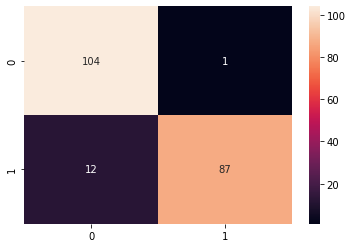

In [42]:
#Confusion Matrix and Classifiaction Report of Support Vector Machine(SVM)
 
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(Y_test,svc_predict)
sns.heatmap(confusion_matrix(Y_test,svc_predict),annot=True,fmt='d')

<AxesSubplot:>

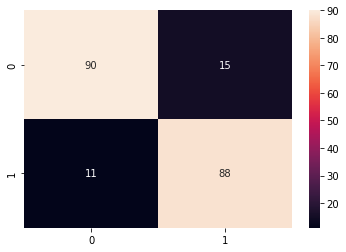

In [43]:
#Confusion Matrix and Classifiaction Report of RandomForestClassifier

from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(Y_test,rf_predict)
sns.heatmap(confusion_matrix(Y_test,rf_predict),annot=True,fmt='d')

In [44]:
print("Classification Report of Support Vector Machine :\n ",classification_report(Y_test,svc_predict))

Classification Report of Support Vector Machine :
                precision    recall  f1-score   support

           0       0.90      0.99      0.94       105
           1       0.99      0.88      0.93        99

    accuracy                           0.94       204
   macro avg       0.94      0.93      0.94       204
weighted avg       0.94      0.94      0.94       204



In [45]:
print("Classification Report of Random Forest Classifier :\n ",classification_report(Y_test,rf_predict))

Classification Report of Random Forest Classifier :
                precision    recall  f1-score   support

           0       0.89      0.86      0.87       105
           1       0.85      0.89      0.87        99

    accuracy                           0.87       204
   macro avg       0.87      0.87      0.87       204
weighted avg       0.87      0.87      0.87       204

